# 16. 파이썬으로 이미지 파일 다루기

## 학습목표
- 컴퓨터에서 이미지가 표현되는 방식을 이해한다.
- Pillow와 OpenCV로 Python에서 이미지 파일을 열고 정보를 추출할 수 있다.
- CIFAR-100에서 히스토그램을 기반으로 유사한 이미지를 골라낼 수 있다.

---

## 16.2 디지털 이미지

- 화소 : 디지털 화면은 수많은 점들로 이루어져 있으며, 색상을 가지는 점 하나를 말한다. 각 화소는 RGB 세개의 단일 색의 강도를 각각 조절하여 색상을 표현한다.
- 래스터(raster) 또는 비트맵(bitmap) 방식
    - 빨강, 초록, 파랑 세 가지 색의 강도로 표현되는 점들로 구성된 디지털 화면에 표시될 이미지를 저장하는 방법 중 가장 단순한 방법으로, 각 점 하나하나의 색상 값을 저장하는 방식이다.
    - 보통 한 점마다 각 색상별로 8비트를 사용하여 0~255 사이의 값(2^8 = 256)으로 해당 색의 감도를 표시한다.
- 벡터 방식의 이미지
    - 상대적인 점과 선의 위치를 방정식으로써 기록해 두었다가, 확대 및 축소에 따라 디지털 화면의 각 화소에 어떻게 표현될지를 재계산하기에 깨짐이 없다.
- 우리가 주로 다루는 파일들 중에는 사진 파일들이 래스터 방식이며, 확대 축소가 자유로이 가능한 글꼴들이 주로 벡터 방식
- 색을 표현하는 다양한 방식을 각각 컬러 스페이스(색 공간)라고 하며, 각 컬러 스페이스를 구성하는 단일 축(RGB에서의 각각 R, G, B)을 채널(channel)이라고 한다

---

## 16.3 Pillow 사용법
- 옛날에 PIL이라는 라이브러리가 있었는데 이 정신을 Pillow가 이어받아 현재까지 이어져 내려오고 있다.
- 간단한 이미지 작업에 Pillow는 Numpy와 결합하여 간편하게 사용할 수 있는 도구이다.
- 이미지는 배열 형태의 데이터!!!!
    - 예를 들어 가로 세로 각 32픽셀에 RGB 세 가지 색상 채널이 있다면, Numpy로 [32, 32, 3] 차원의 배열을 생성
    - 또한 데이터 타입을 uint8, 즉 각 값이 부호가 없는(unsigned) 8비트 정수(integer)가 되어 0~255(2의 8승 = 256) 사이의 값을 나타내도록

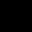

In [1]:
import numpy as np
from PIL import Image

data = np.zeros([32, 32, 3], dtype=np.uint8)
image = Image.fromarray(data, 'RGB')
image

### PIL.Image.fromarray()
- 만들어진 배열을 PIL.Image.fromarray()를 통해 바로 이미지 객체로 변환한 뒤 화면에 표시
- np.zeros()로 초기화된 모든 픽셀의 모든 채널의 값이 0이기 때문에 검은색 이미지

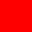

In [2]:
data[:, :] = [255, 0, 0]
image = Image.fromarray(data, 'RGB')
image

### 연습문제

#### 1. 가로 세로 각 128 픽셀짜리 흰색 이미지를 만들어 화면에 표시해 봅시다

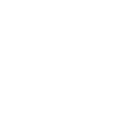

In [4]:
data = np.zeros([128,128,3], dtype=np.uint8)
data[:,:] = [255,255,255]
image = Image.fromarray(data, 'RGB')
image

#### 2. 연습용 이미지를 열어 width와 height를 출력하고, .save()를 이용하여 jpg 파일 포맷으로 저장해 봅시다

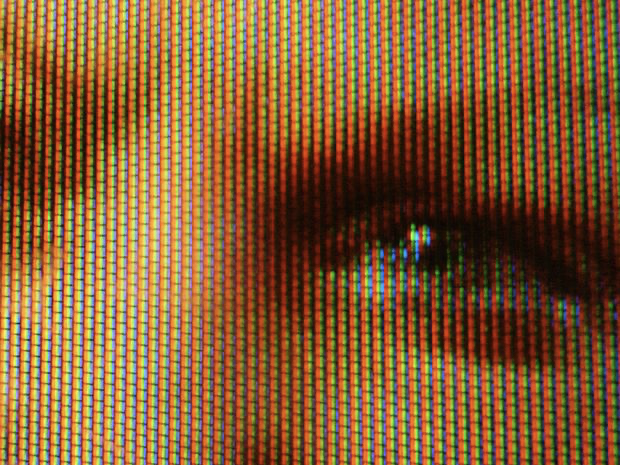

In [5]:
from PIL import Image
import os

image_path = os.getenv('HOME') + '/aiffel/python_image_proc/data/pillow_practice.png'

# 이미지 열기
image = Image.open(image_path)
image

In [6]:
#  width와 height 출력
print(image.width)
print(image.height)

620
465


In [7]:
# JPG 파일 형식으로 저장해보기
new_image_path = os.getenv("HOME") + '/aiffel/python_image_proc/data/jpg_pillow_practice.jpg'
image = image.convert('RGB')
image.save(new_image_path)

#### 3. .resize()를 이용하여 이미지 크기를 100X200으로 변경하여 저장해봅시다


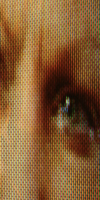

In [12]:
resized_image = image.resize((100,200))

resized_image_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/pillow_practice_resized.png'
resized_image.save(resized_image_path)
resized_image

#### 4.  .crop()을 이용하여 눈 부분만 잘라내어 저장해 봅시다

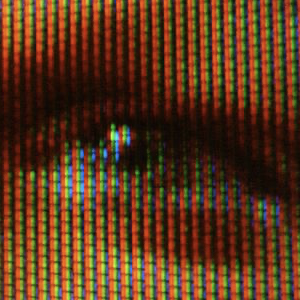

In [13]:
box = (300,100,600,400)
region = image.crop(box)

cropped_image_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/pillow_practice_cropped.png'
region.save(cropped_image_path)
region

---

## 16.4 Pillow를 활용한 데이터 전처리

### CIFAR-100 데이터를 받아 개별 이미지 파일로 추출하기
- 32x32 화소 해상도의 이미지들이 100개 클래스 당 600장(각 학습용 500장, 테스트용 100장)하여 총 60,000장 있습니다

In [16]:
import os
import pickle
from PIL import Image

dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')

print(type(train))
print(train) # 혹시 내용이 궁금하다면 주석을 풀고 실행해 보세요.

<class 'dict'>
{b'filenames': [b'bos_taurus_s_000507.png', b'stegosaurus_s_000125.png', b'mcintosh_s_000643.png', b'altar_boy_s_001435.png', b'cichlid_s_000031.png', b'phone_s_002161.png', b'car_train_s_000043.png', b'beaker_s_000604.png', b'fog_s_000397.png', b'rogue_elephant_s_000421.png', b'computer_keyboard_s_000757.png', b'willow_tree_s_000645.png', b'sunflower_s_000549.png', b'palace_s_000759.png', b'adriatic_s_001782.png', b'computer_keyboard_s_001277.png', b'bike_s_000682.png', b'wolf_pup_s_001323.png', b'squirrel_s_002467.png', b'sea_s_000678.png', b'shrew_s_002233.png', b'pine_tree_s_000087.png', b'rose_s_000373.png', b'surveillance_system_s_000769.png', b'pine_s_001533.png', b'table_s_000897.png', b'opossum_s_001237.png', b'quercus_alba_s_000257.png', b'leopard_s_000414.png', b'possum_s_002195.png', b'bike_s_000127.png', b'balmoral_castle_s_000361.png', b'acer_saccharinum_s_000646.png', b'lapin_s_000916.png', b'chimp_s_001419.png', b'clock_s_002291.png', b'streetcar_s_000663

In [17]:
train.keys()

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

In [18]:
type(train[b'filenames'])

list

In [19]:
train[b'filenames'][0:5]

[b'bos_taurus_s_000507.png',
 b'stegosaurus_s_000125.png',
 b'mcintosh_s_000643.png',
 b'altar_boy_s_001435.png',
 b'cichlid_s_000031.png']

In [20]:
train[b'data'][0:5]

array([[255, 255, 255, ...,  10,  59,  79],
       [255, 253, 253, ..., 253, 253, 255],
       [250, 248, 247, ..., 194, 207, 228],
       [124, 131, 135, ..., 232, 236, 231],
       [ 43,  32,  87, ...,  60,  29,  37]], dtype=uint8)

In [21]:
train[b'data'][0].shape

(3072,)

- 3072라는 숫자는 빨강 초록 파랑 3채널 X 1024(=32 * 32)씩 각 화소에 해당
- 이 Numpy 배열을 잘 reshape하면 이미지 파일 원본이 복구된다는 뜻
- 그렇다고 그냥 모양만 맞추어 reshape하면 안된다
- 1024를 32X32에 채우는 것을 3번 반복하는 방식의 reshape이어야 한다
- 앞선 차원부터 데이터를 채우는 방식의 reshape를 위해 np.reshape에는 order라는 인자가 있다. 이 값을 F로 주면 원하는 형태로 진행된다

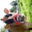

In [22]:
image_data = train[b'data'][0].reshape([32, 32, 3], order='F')   # order를 주의하세요!!
image = Image.fromarray(image_data)    # Pillow를 사용하여 Numpy 배열을 Image객체로 만들어서
image    # 화면에 띄워 봅시다!!

- x축과 y축이 뒤집어져 나오고 있어서 축을 바꿔주는 작업이 필요하다
- np.swapaxes(0, 1)이 유용

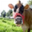

In [23]:
image_data = image_data.swapaxes(0, 1)
image = Image.fromarray(image_data)
image

In [24]:
import os
import pickle
from PIL import Image
import numpy
from tqdm import tqdm

dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

# image를 저장할 cifar-100-python의 하위 디렉토리(images)를 생성합니다. 
images_dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/cifar-images'
if not os.path.exists(images_dir_path):
    os.mkdir(images_dir_path)  # images 디렉토리 생성

# 32X32의 이미지 파일 50000개를 생성합니다. 
with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')
    for i in tqdm(range(len(train[b'filenames']))):
        filename = train[b'filenames'][i].decode()
        data = train[b'data'][i].reshape([32, 32, 3], order='F')
        image = Image.fromarray(data.swapaxes(0, 1))
        image.save(os.path.join(images_dir_path, filename))

100%|██████████| 50000/50000 [00:21<00:00, 2298.19it/s]


### pickle
- pickle 모듈을 이용하면 원하는 데이터를 자료형의 변경없이 파일로 저장하여 그대로 로드할 수 있다.
- pickle로 데이터를 저장하거나 불러올때는 파일을 바이트형식으로 읽거나 써야한다. (wb, rb)

### tqdm
- 이 라이브러리를 이용하면 진행 상황을 Progress Bar 형태로 한눈에 확인할 수 있다.

---

## 16.5  OpenCV (1) 안녕, OpenCV

### OpenCV
- 오픈소스로 제공되는 컴퓨터 비전용 라이브러리로, C++, Python, Java, MATLAB 등 다양한 언어에서 호출하여 사용할 수 있으며, 영상 처리에 대한 다양한 고급 기능들이 사용하기 쉽도록 구현되어 있다
- https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html
- 주의: OpenCV에서는 RGB가 아닌 BGR 순서를 사용
- 이 중에 이미지에서 특정 색을 가진 영역만 추출하는 예제를 한번 살펴보겠다.
    - 이 예제에서는 이미지를 읽어 들이고, 파란색을 찾기 쉽도록 컬러스페이스를 BGR(RGB)에서 HSV로 변환한 뒤, 해당 색상과 맞는 영역만 표시하는 작업이 진행

### HSV
- Hue, Saturation, Value의 약자. 원기둥 또는 원뿔 모양으로 표현한다.
- H : 색상, 색의 종류
    - 0~360도의 범위를 갖지만, 8비트 범위내에서 표현할 때는 0~255까지밖에 표현하지 못하기 때문에 H값을 0~179범위내로 표현
- S : 채도, 색의 탁하고 선명한 정도
    - 특정한 색상의 가장 진한 상태를 8비트로 표현할 때 255로 나타내며 색상의 진함 정도를 나타낸다. 0이면 같은 명도의 무채색을 나타낸다
- V : 명도, 빛의 밝기.
    - 밝은 정도를 나타내며 흰색이 255면 검은색은 0이다.

### 연습문제

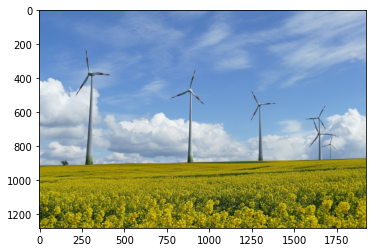

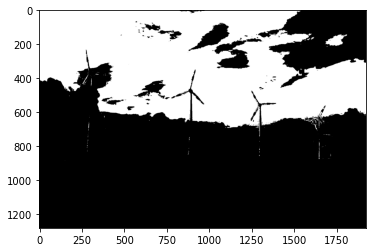

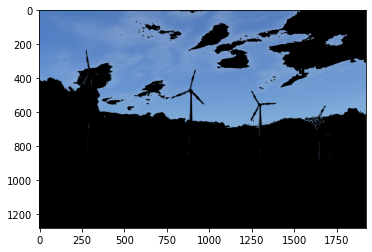

In [25]:
import os
import cv2 as cv
import numpy as np
from  matplotlib import pyplot as plt
%matplotlib inline

img_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cv_practice.png'
img = cv.imread(img_path)

# Convert BGR to HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# define range of blue color in HSV
lower_blue = np.array([100,100,100])
upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors
mask = cv.inRange(hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv.bitwise_and(img, img, mask=mask)

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))
plt.show()

---

## 16.6 OpenCV (2) 톺아보기

In [26]:
import os
import cv2 as cv
import numpy as np
from  matplotlib import pyplot as plt
%matplotlib inline

### OpenCV
- pip으로 설치 시 opencv-python이라는 이름으로 설치
- import할 때는 cv2라는 이름을 쓴다
- OpenCV와 함께, 숫자 배열을 처리하는데 궁합이 잘 맞는 Numpy도 불러온다

In [27]:
img_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cv_practice.png'
img = cv.imread(img_path)

### cv.imread()
- The function imread loads an image from the specified file and returns it
- 파일로부터 이미지를 읽어와 반환해 주는 함수

In [28]:
# Convert BGR to HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

### cv.cvtColor()
- 컬러 스페이스 변환을 위한 함수

In [29]:
# define range of blue color in HSV
lower_blue = np.array([100,100,100])
upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors
mask = cv.inRange(hsv, lower_blue, upper_blue)

### 코드설명
- 숫자로 파란색이라는 부분을 정의하고, 이 값들을 기준으로 이미지에서 마스크를 생성하는 과정
    - 마스크 : 수채화를 그리거나 인테리어 공사 중 실리콘을 바를 때 사용하는 마스킹 테이프의 역할과 동일하다. 우리가 원하는 부분만을 떼어낼 수 있도록 하는 역할이다
- HSV 색 공간에서 색상(Hue) 값 110~130 사이, 채도(Saturation) 및 명도(Value) 값 50~255 사이의 색들을 파란색이라고 정의
- cv.inRange()
    - img 를 변환한 hsv에다가 이 기준들(lower_blue, upper_blue)를 적용하여, 해당하는 픽셀들에는 1, 그렇지 않은 픽셀들에는 0을 찍어놓은 배열을 반환하는 역할
- 아래 이미지의 왼쪽 중 original frame으로 mask를 만든 뒤 1을 흰색으로, 0을 검정으로 표시한다면, 아래 이미지의 가운데에 있는 mask image와 동일하게 된다
- 오른쪽처럼 선택한 부분만 오려내자!

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/Untitled_5_ffOL9vO.png)

In [31]:
# Bitwise-AND mask and original image
res = cv.bitwise_and(img, img, mask=mask)

### cv.bitwise_and()
- 이미지 두 장을 받아서 AND 비트 연산을 하는 함수
- 이 기능이 필요한게 아니니까 두 장 다 같은 이미지를 넣어서 결국 동일한 이미지가 나오게 한다
- 대신 중요한 mask를 같이 넣어줘서, 해당 영역만 따오도록 한다

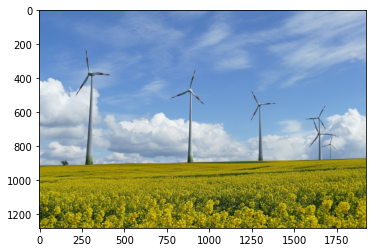

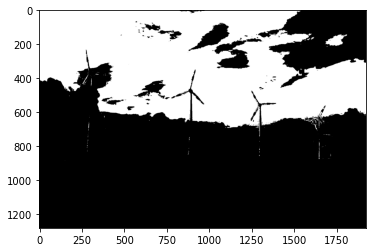

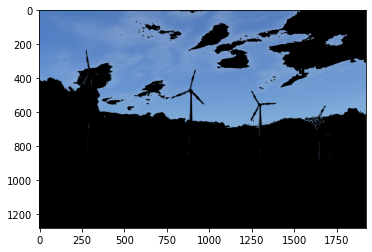

In [32]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))
plt.show()

### plt.imshow()
- OpenCV는 RGB가 아닌 BGR 순서를 사용하기 때문에 plit로 이미지를 보여줄 때는 cv.cvtColor(res, cv.COLOR_BGR2RGB) 함수를 이용해 cv이미지 객체의 컬러를 변환해 줘야 한다
- cv로 이미지를 띄우는 방법은 cv.imshow(res)

---

## 16.7 실습 : 비슷한 이미지 찾아내기
- 이미지에서 색상 히스토그램을 추출하고, 이를 서로 비교하는 기능들을 불러 사용

In [33]:
import os
import pickle
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from PIL import Image

# 전처리 시 생성했던 디렉토리 구조
dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/'
train_file_path = os.path.join(dir_path, 'train')
images_dir_path = os.path.join(dir_path, 'cifar-images')

In [34]:
# 파일명을 인자로 받아 해당 이미지 파일과 히스토그램을 출력해 주는 함수
def draw_color_histogram_from_image(file_name):
    image_path = os.path.join(images_dir_path, file_name)
    # 이미지 열기
    img = Image.open(image_path)
    cv_image = cv2.imread(image_path)

    # Image와 Histogram 그려보기
    f=plt.figure(figsize=(10,3))
    im1 = f.add_subplot(1,2,1)
    im1.imshow(img)
    im1.set_title("Image")

    im2 = f.add_subplot(1,2,2)
    color = ('b','g','r')
    for i,col in enumerate(color):
        # image에서 i번째 채널의 히스토그램을 뽑아서(0:blue, 1:green, 2:red)
        histr = cv2.calcHist([cv_image],[i],None,[256],[0,256])   
        im2.plot(histr,color = col)   # 그래프를 그릴 때 채널 색상과 맞춰서 그립니다.
    im2.set_title("Histogram")

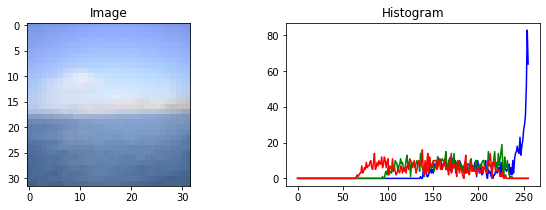

In [35]:
draw_color_histogram_from_image('adriatic_s_001807.png')

## 코드구현

## 1

In [36]:
def get_histogram(image):
    histogram = []

    # Create histograms per channels, in 4 bins each.
    for i in range(3):
        channel_histogram = cv2.calcHist(images=[image],
                                         channels=[i],
                                         mask=None,
                                         histSize=[4],  # 히스토그램 구간을 4개로 한다.
                                         ranges=[0, 256])
        histogram.append(channel_histogram)  

    histogram = np.concatenate(histogram)
    histogram = cv2.normalize(histogram, histogram)

    return histogram

In [37]:
# get_histogram() 확인용 코드
filename = train[b'filenames'][0].decode()
file_path = os.path.join(images_dir_path, filename)
image = cv2.imread(file_path)
histogram = get_histogram(image)
histogram

array([[0.3126804 ],
       [0.4080744 ],
       [0.14521089],
       [0.21940625],
       [0.18654831],
       [0.23742512],
       [0.30208108],
       [0.35931748],
       [0.06465594],
       [0.35825753],
       [0.36991683],
       [0.29254165]], dtype=float32)

## 2. build_histogram_db()
- CIFAR-100 이미지들을 불러온다.
- CIFAR-100 이미지들을 하나하나 히스토그램으로 만든다.
- 이미지 이름을 키로 하고, 히스토그램을 값으로 하는 딕셔너리 histogram_db를 반환한다.


In [38]:

def build_histogram_db():
    histogram_db = {}

    #디렉토리에 모아 둔 이미지 파일들을 전부 리스트업합니다. 
    path = images_dir_path
    file_list = os.listdir(images_dir_path)

    for file_name in tqdm(file_list):
        file_path = os.path.join(images_dir_path, file_name)
        image = cv2.imread(file_path)

        histogram = get_histogram(image)

        histogram_db[file_name] = histogram

    return histogram_db


In [39]:
histogram_db = build_histogram_db()
histogram_db['adriatic_s_001807.png']

100%|██████████| 49999/49999 [00:05<00:00, 9554.75it/s]


array([[0.        ],
       [0.        ],
       [0.29744893],
       [0.5828624 ],
       [0.        ],
       [0.17107612],
       [0.41608465],
       [0.29315054],
       [0.        ],
       [0.34301192],
       [0.37224102],
       [0.16505837]], dtype=float32)

## 3

In [40]:
def get_target_histogram():
    filename = input("이미지 파일명을 입력하세요: ")
    if filename not in histogram_db:
        print('유효하지 않은 이미지 파일명입니다.')
        return None
    return histogram_db[filename]

In [41]:
target_histogram = get_target_histogram()
target_histogram

이미지 파일명을 입력하세요: adriatic_s_001807.png


array([[0.        ],
       [0.        ],
       [0.29744893],
       [0.5828624 ],
       [0.        ],
       [0.17107612],
       [0.41608465],
       [0.29315054],
       [0.        ],
       [0.34301192],
       [0.37224102],
       [0.16505837]], dtype=float32)

## 4. search()
- 입력 이미지 히스토그램 target_histogram와 전체 검색 대상 이미지들의 히스토그램을 가진 딕셔너리 histogram_db를 입력으로 받는다.
- OpenCV의 compareHist() 함수를 사용하여 입력 이미지와 검색 대상 이미지 하나하나의 히스토그램 간 유사도를 계산한다. 결과는 result라는 이름의 딕셔너리로, 키는 이미지 이름, 값은 유사도로 한다.
- 계산된 유사도를 기준으로 정렬하여 순서를 매긴다.
- 유사도 순서상으로 상위 5개 이미지만 골라서 result에 남긴다.

In [42]:
def search(histogram_db, target_histogram, top_k=5):
    results = {}

    # Calculate similarity distance by comparing histograms.
    for file_name, histogram in tqdm(histogram_db.items()):
        distance = cv2.compareHist(H1=target_histogram,
                                   H2=histogram,
                                   method=cv2.HISTCMP_CHISQR)

        results[file_name] = distance

    results = dict(sorted(results.items(), key=lambda item: item[1])[:top_k])

    return results

In [43]:
result = search(histogram_db, target_histogram)
result

100%|██████████| 49999/49999 [00:00<00:00, 690411.15it/s]


{'adriatic_s_001807.png': 0.0,
 'baby_s_001654.png': 0.047506706444185816,
 'fogbank_s_000423.png': 0.059270738493642845,
 'tank_s_000442.png': 0.060966690827361725,
 'dessert_plate_s_000124.png': 0.06113711905561663}

## 5

In [45]:

def show_result(result):
    f=plt.figure(figsize=(10,3))
    for idx, filename in enumerate(result.keys()):    
        img_path = os.path.join(images_dir_path, filename)
        im = f.add_subplot(1,len(result),idx+1)
        img = Image.open(img_path)
        im.imshow(img)

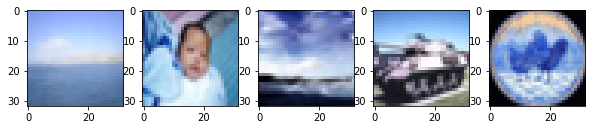

In [46]:
show_result(result)

## 6

이미지 파일명을 입력하세요: adriatic_s_001807.png


100%|██████████| 49999/49999 [00:00<00:00, 711816.16it/s]


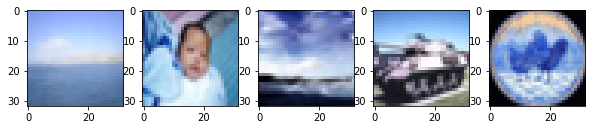

In [47]:
target_histogram = get_target_histogram()
result = search(histogram_db, target_histogram)
show_result(result)